In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Drop duplicates

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [5]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

<Axes: >

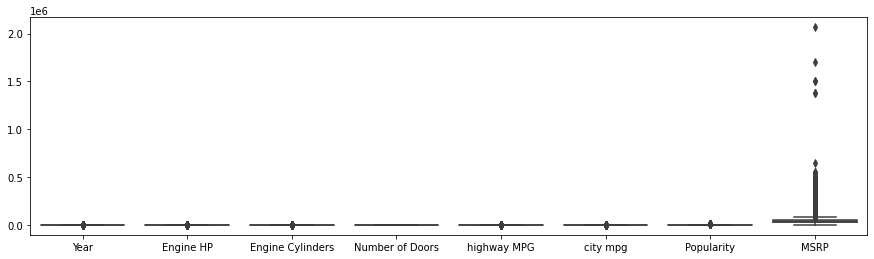

In [6]:
plt.figure(figsize=(15, 4))
sns.boxplot(df)

In [7]:
outliers = ((df[IQR.index] < Q1 - 1.5*IQR) | (df[IQR.index] > Q3 + 1.5*IQR)).any(axis=1)
df = df[~outliers]

<Axes: >

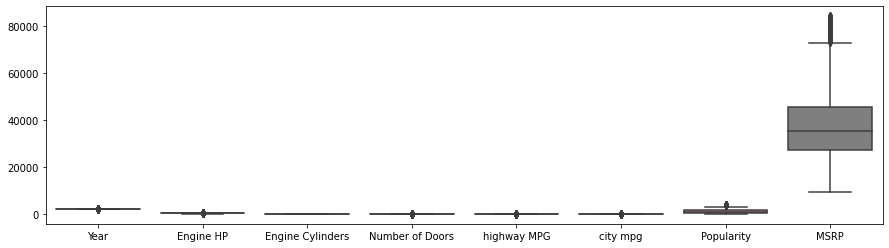

In [8]:
plt.figure(figsize=(15, 4))
sns.boxplot(df)

In [9]:
df2 = deepcopy(df)

In [10]:
market_categories = set(','.join(df2['Market Category'].unique()).split(','))

for cat in market_categories:
    df2[f'Market Category_{cat}'] = df2['Market Category'].apply(lambda x: cat in x).astype(int)

In [11]:
df2.drop(columns=['Market Category', 'Make', 'Model'], inplace=True)

In [12]:
df_dummy = pd.get_dummies(df2)

<Axes: >

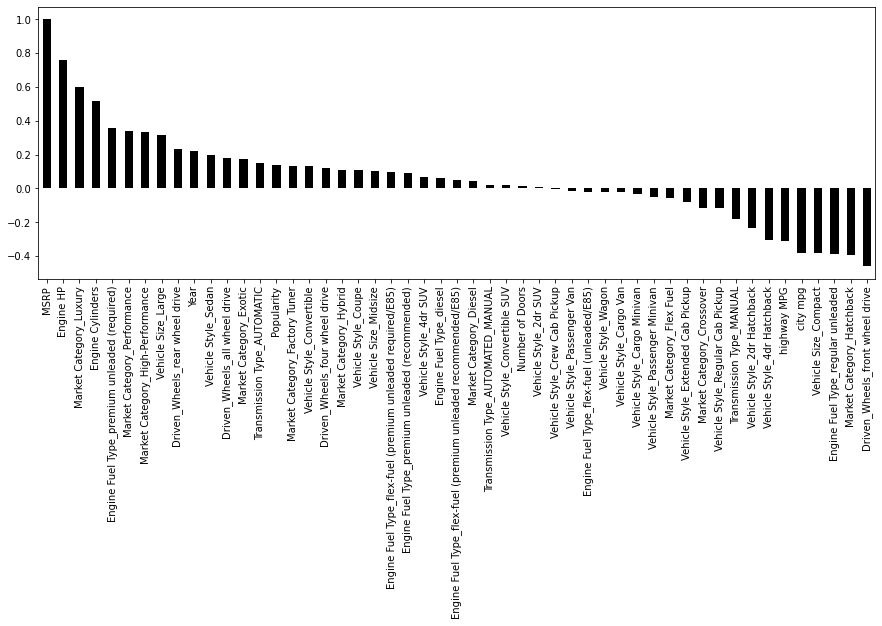

In [13]:
df_dummy.corr()['MSRP'].sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), cmap='copper')

<Axes: xlabel='Engine Fuel Type'>

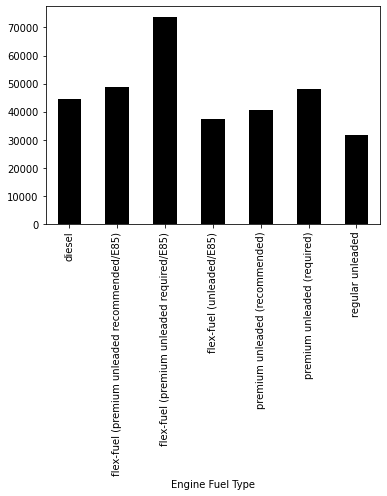

In [14]:
df.groupby('Engine Fuel Type')['MSRP'].mean().plot.bar(cmap='copper')

<Axes: >

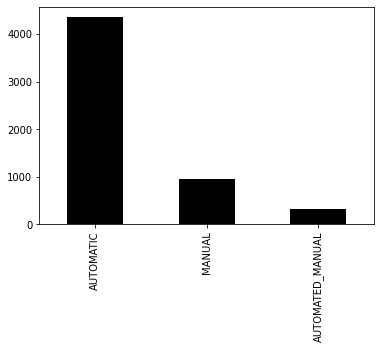

In [15]:
df['Transmission Type'].value_counts().plot.bar(cmap='copper')

<Axes: xlabel='Engine HP', ylabel='MSRP'>

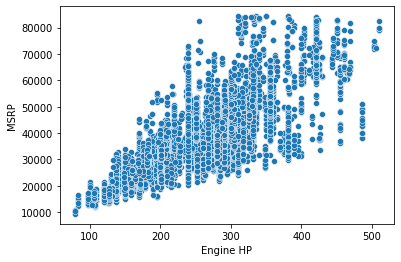

In [16]:
sns.scatterplot(data=df, x='Engine HP', y='MSRP')

In [17]:
df_dummy

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Market Category_Performance,Market Category_Flex Fuel,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,56670,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,50620,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,50920,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y = df_dummy['MSRP'].values
X = df_dummy.drop(columns='MSRP')

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values

Scaler = MinMaxScaler()
Scaler.fit(X)

X = Scaler.transform(X)
X = pd.DataFrame(X)
X.columns = features

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
metrics.mean_squared_error(y_test, prediction)

36772770.25726141

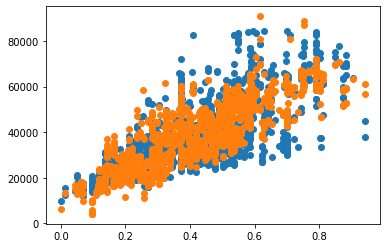

In [34]:
plt.scatter(X_test['Engine HP'], y_test)
plt.scatter(X_test['Engine HP'], prediction)

<Axes: >

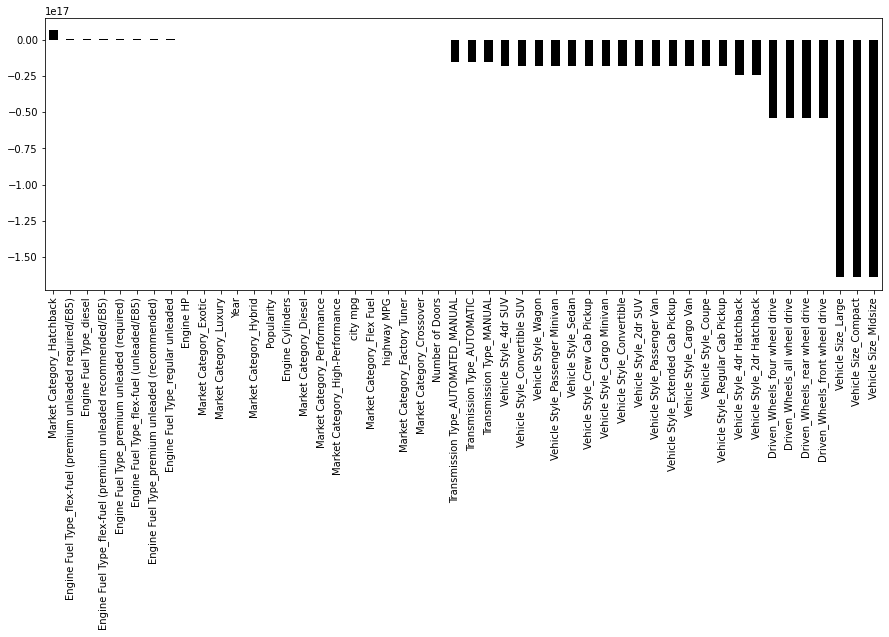

In [35]:
pd.Series(model.coef_, index=features).sort_values(ascending=False).plot.bar(cmap='copper', figsize=(15, 5))

#### Neural Networks

In [27]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

model = Sequential([
    Dense(40, activation='relu'),
    Dense(25, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer=Adam(), loss=MeanSquaredError())
model.fit(X_train, y_train, epochs=100, verbose=2)

prediction = model.predict(X_test)
metrics.mean_squared_error(y_test, prediction)

Epoch 1/100
123/123 - 1s - loss: 1681143936.0000 - 1s/epoch - 8ms/step
Epoch 2/100
123/123 - 0s - loss: 1513522432.0000 - 199ms/epoch - 2ms/step
Epoch 3/100
123/123 - 0s - loss: 664169280.0000 - 201ms/epoch - 2ms/step
Epoch 4/100
123/123 - 0s - loss: 146877968.0000 - 208ms/epoch - 2ms/step
Epoch 5/100
123/123 - 0s - loss: 111306024.0000 - 197ms/epoch - 2ms/step
Epoch 6/100
123/123 - 0s - loss: 94945440.0000 - 196ms/epoch - 2ms/step
Epoch 7/100
123/123 - 0s - loss: 83955496.0000 - 214ms/epoch - 2ms/step
Epoch 8/100
123/123 - 0s - loss: 76443824.0000 - 213ms/epoch - 2ms/step
Epoch 9/100
123/123 - 0s - loss: 71045408.0000 - 204ms/epoch - 2ms/step
Epoch 10/100
123/123 - 0s - loss: 67089196.0000 - 200ms/epoch - 2ms/step
Epoch 11/100
123/123 - 0s - loss: 63830336.0000 - 211ms/epoch - 2ms/step
Epoch 12/100
123/123 - 0s - loss: 61232252.0000 - 206ms/epoch - 2ms/step
Epoch 13/100
123/123 - 0s - loss: 58832292.0000 - 204ms/epoch - 2ms/step
Epoch 14/100
123/123 - 0s - loss: 56933908.0000 - 207ms/

33563115.880602434

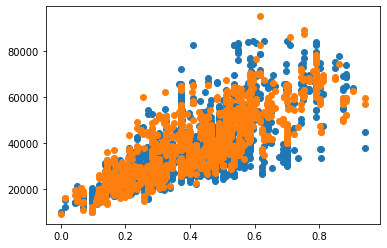

In [28]:
plt.scatter(X_test['Engine HP'], y_test)
plt.scatter(X_test['Engine HP'], prediction)

#### XGBOOST

In [29]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
metrics.mean_squared_error(y_test, prediction)

13217986.250050675

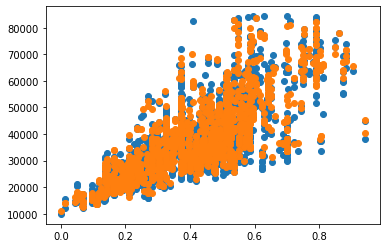

In [30]:
plt.scatter(X_test['Engine HP'], y_test)
plt.scatter(X_test['Engine HP'], prediction)

<Axes: >

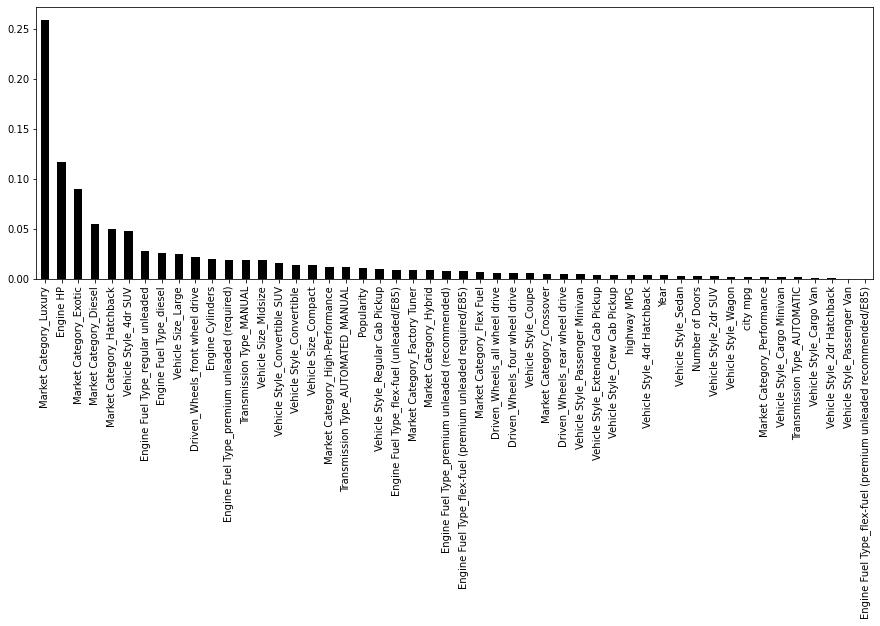

In [31]:
pd.Series(model.feature_importances_, index=features).sort_values(ascending=False).plot.bar(cmap='copper', figsize=(15, 5))